In [1]:
# import xarray as xr
# path = '/scratch/08105/ms86336/TEMPO/'
# ds = xr.open_mfdataset(path+'TEMPO_NO2*nc')

In [1]:
!pwd

/scratch/08105/ms86336


In [2]:
!free -m

               total        used        free      shared  buff/cache   available
Mem:          243341      158324       19302        2651       72922       85016
Swap:              0           0           0


In [11]:
from netCDF4 import Dataset

# Open the NetCDF file
file_path = '/scratch/08105/ms86336/TEMPO/TEMPO_NO2_L3_V03_20240303T234057Z_S015.nc'  # Replace with your actual file name
ncfile = Dataset(file_path, 'r')

# List all groups
print("Groups in the file:")
for group in ncfile.groups:
    print(group)

# Alternatively, you can print the entire structure of the file
print(ncfile)

Groups in the file:
product
qa_statistics
geolocation
support_data
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    history: 2024-08-16T00:30:50Z: L2_regrid -v /tempo/nas0/sdpc/liveroot/temposdpc/ops4/etc/l3.cfg

    scan_num: 15
    time_coverage_start: 2024-03-03T23:40:57Z
    time_coverage_end: 2024-03-04T00:20:43Z
    time_coverage_start_since_epoch: 1393544475.157643
    time_coverage_end_since_epoch: 1393546861.7456307
    product_type: NO2
    processing_level: 3
    processing_version: 3
    sdpc_version: TEMPO_SDPC_v4.4.2
    production_date_time: 2024-08-16T00:30:51Z
    begin_date: 2024-03-03
    begin_time: 23:40:57
    end_date: 2024-03-04
    end_time: 00:20:43
    local_granule_id: TEMPO_NO2_L3_V03_20240303T234057Z_S015.nc
    version_id: 3
    pge_version: 1.0.0
    shortname: TEMPO_NO2_L3
    input_files: ['TEMPO_NO2_L2_V03_20240303T234057Z_S015G01.nc', 'TEMPO_NO2_L2_V03_20240303T234737Z_S015G02.nc', 'TEMPO_NO2_L2_V03_20240303T2

In [7]:
import xarray as xr
ds = xr.open_dataset('/scratch/08105/ms86336/TEMPO/TEMPO_NO2_L3_V03_20240303T234057Z_S015.nc')
ds

<xarray.Dataset> Size: 91MB
Dimensions:    (longitude: 7750, latitude: 2950, time: 1)
Coordinates:
  * longitude  (longitude) float32 31kB -168.0 -168.0 -167.9 ... -13.03 -13.01
  * latitude   (latitude) float32 12kB 14.01 14.03 14.05 ... 72.95 72.97 72.99
  * time       (time) datetime64[ns] 8B 2024-03-03T23:41:15.157643008
Data variables:
    weight     (latitude, longitude) float32 91MB ...
Attributes: (12/40)
    history:                          2024-08-16T00:30:50Z: L2_regrid -v /tem...
    scan_num:                         15
    time_coverage_start:              2024-03-03T23:40:57Z
    time_coverage_end:                2024-03-04T00:20:43Z
    time_coverage_start_since_epoch:  1393544475.157643
    time_coverage_end_since_epoch:    1393546861.7456307
    ...                               ...
    title:                            TEMPO Level 3 nitrogen dioxide product
    collection_shortname:             TEMPO_NO2_L3
    collection_version:               1
    keywords:                         EARTH SCIENCE>ATMOSPHERE>AIR QUALITY>NI...
    summary:                          Nitrogen dioxide Level 3 files provide ...
    coremetadata:                     \nGROUP                  = INVENTORYMET...

In [19]:
import xarray as xr

# Define the path where the TEMPO NO2 data is stored
path = '/scratch/08105/ms86336/TEMPO/'

# Open multiple NetCDF files with chunking applied
ds_ = xr.open_mfdataset(path + 'TEMPO_NO2_L3_V03_20230804*nc')

# Inspect the dataset
ds_

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 11, latitude: 2950, longitude: 7750)
Coordinates:
  * longitude  (longitude) float32 31kB -168.0 -168.0 -167.9 ... -13.03 -13.01
  * latitude   (latitude) float32 12kB 14.01 14.03 14.05 ... 72.95 72.97 72.99
  * time       (time) datetime64[ns] 88B 2023-08-04T12:12:06.149609216 ... 20...
Data variables:
    weight     (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 590, 1550), meta=np.ndarray>
Attributes: (12/40)
    history:                          2024-06-03T23:04:37Z: L2_regrid -v /tem...
    scan_num:                         1
    time_coverage_start:              2023-08-04T12:11:48Z
    time_coverage_end:                2023-08-04T13:13:58Z
    time_coverage_start_since_epoch:  1375186326.149609
    time_coverage_end_since_epoch:    1375190056.3875136
    ...                               ...
    title:                            TEMPO Level 3 nitrogen dioxide product
    collection_shortname:             TEMPO_NO2_L3
    collection_version:               1
    keywords:                         EARTH SCIENCE>ATMOSPHERE>AIR QUALITY>NI...
    summary:                          Nitrogen dioxide Level 3 files provide ...
    coremetadata:                     \nGROUP                  = INVENTORYMET...

In [20]:
import xarray as xr

# Define the path where the TEMPO NO2 data is stored
path = '/scratch/08105/ms86336/TEMPO/'

# Open multiple NetCDF files with chunking applied
ds = xr.open_mfdataset(path + 'TEMPO_NO2_L3_V03_20230804*nc', group='product', concat_dim='time', combine='nested')

# Inspect the dataset
ds

<xarray.Dataset> Size: 7GB
Dimensions:                                  (time: 11, latitude: 2950,
                                              longitude: 7750)
Dimensions without coordinates: time, latitude, longitude
Data variables:
    vertical_column_troposphere              (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 738, 1938), meta=np.ndarray>
    vertical_column_troposphere_uncertainty  (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 738, 1938), meta=np.ndarray>
    vertical_column_stratosphere             (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 738, 1938), meta=np.ndarray>
    main_data_quality_flag                   (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 984, 2584), meta=np.ndarray>

In [23]:
# Assign the latitude and longitude as coordinates if they exist as dimensions
ds = ds.assign_coords(latitude=("latitude", ds_["latitude"].data), longitude=("longitude", ds_["longitude"].data) , time=("time", ds_["time"].data))
ds

<xarray.Dataset> Size: 7GB
Dimensions:                                  (time: 11, latitude: 2950,
                                              longitude: 7750)
Coordinates:
  * latitude                                 (latitude) float32 12kB 14.01 .....
  * longitude                                (longitude) float32 31kB -168.0 ...
  * time                                     (time) datetime64[ns] 88B 2023-0...
Data variables:
    vertical_column_troposphere              (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 738, 1938), meta=np.ndarray>
    vertical_column_troposphere_uncertainty  (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 738, 1938), meta=np.ndarray>
    vertical_column_stratosphere             (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 738, 1938), meta=np.ndarray>
    main_data_quality_flag                   (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 984, 2584), meta=np.ndarray>

In [24]:
ds = ds.chunk({"latitude": 100, "longitude":100, "time":10}).vertical_column_troposphere
ds

<xarray.DataArray 'vertical_column_troposphere' (time: 11, latitude: 2950,
                                                 longitude: 7750)> Size: 2GB
dask.array<rechunk-merge, shape=(11, 2950, 7750), dtype=float64, chunksize=(10, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 12kB 14.01 14.03 14.05 ... 72.95 72.97 72.99
  * longitude  (longitude) float32 31kB -168.0 -168.0 -167.9 ... -13.03 -13.01
  * time       (time) datetime64[ns] 88B 2023-08-04T12:12:06.149609216 ... 20...
Attributes:
    long_name:  troposphere nitrogen dioxide vertical column
    units:      molecules/cm^2

# Figure 1: Climatology of NO2 from TEMPO

In [25]:
ds.coords

Coordinates:
  * latitude   (latitude) float32 12kB 14.01 14.03 14.05 ... 72.95 72.97 72.99
  * longitude  (longitude) float32 31kB -168.0 -168.0 -167.9 ... -13.03 -13.01
  * time       (time) datetime64[ns] 88B 2023-08-04T12:12:06.149609216 ... 20...

0it [00:00, ?it/s]/tmp/ipykernel_1296964/3828650051.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(x_ticks)
1it [00:00,  1.23it/s]/tmp/ipykernel_1296964/3828650051.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(x_ticks)
2it [00:01,  1.65it/s]/tmp/ipykernel_1296964/3828650051.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(x_ticks)
3it [00:01,  1.88it/s]/tmp/ipykernel_1296964/3828650051.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(x_ticks)
4it [00:02,  1.55it/s]/tmp/ipykernel_1296964/3828650051.py:57: UserWarning: set_ticklabels() should 

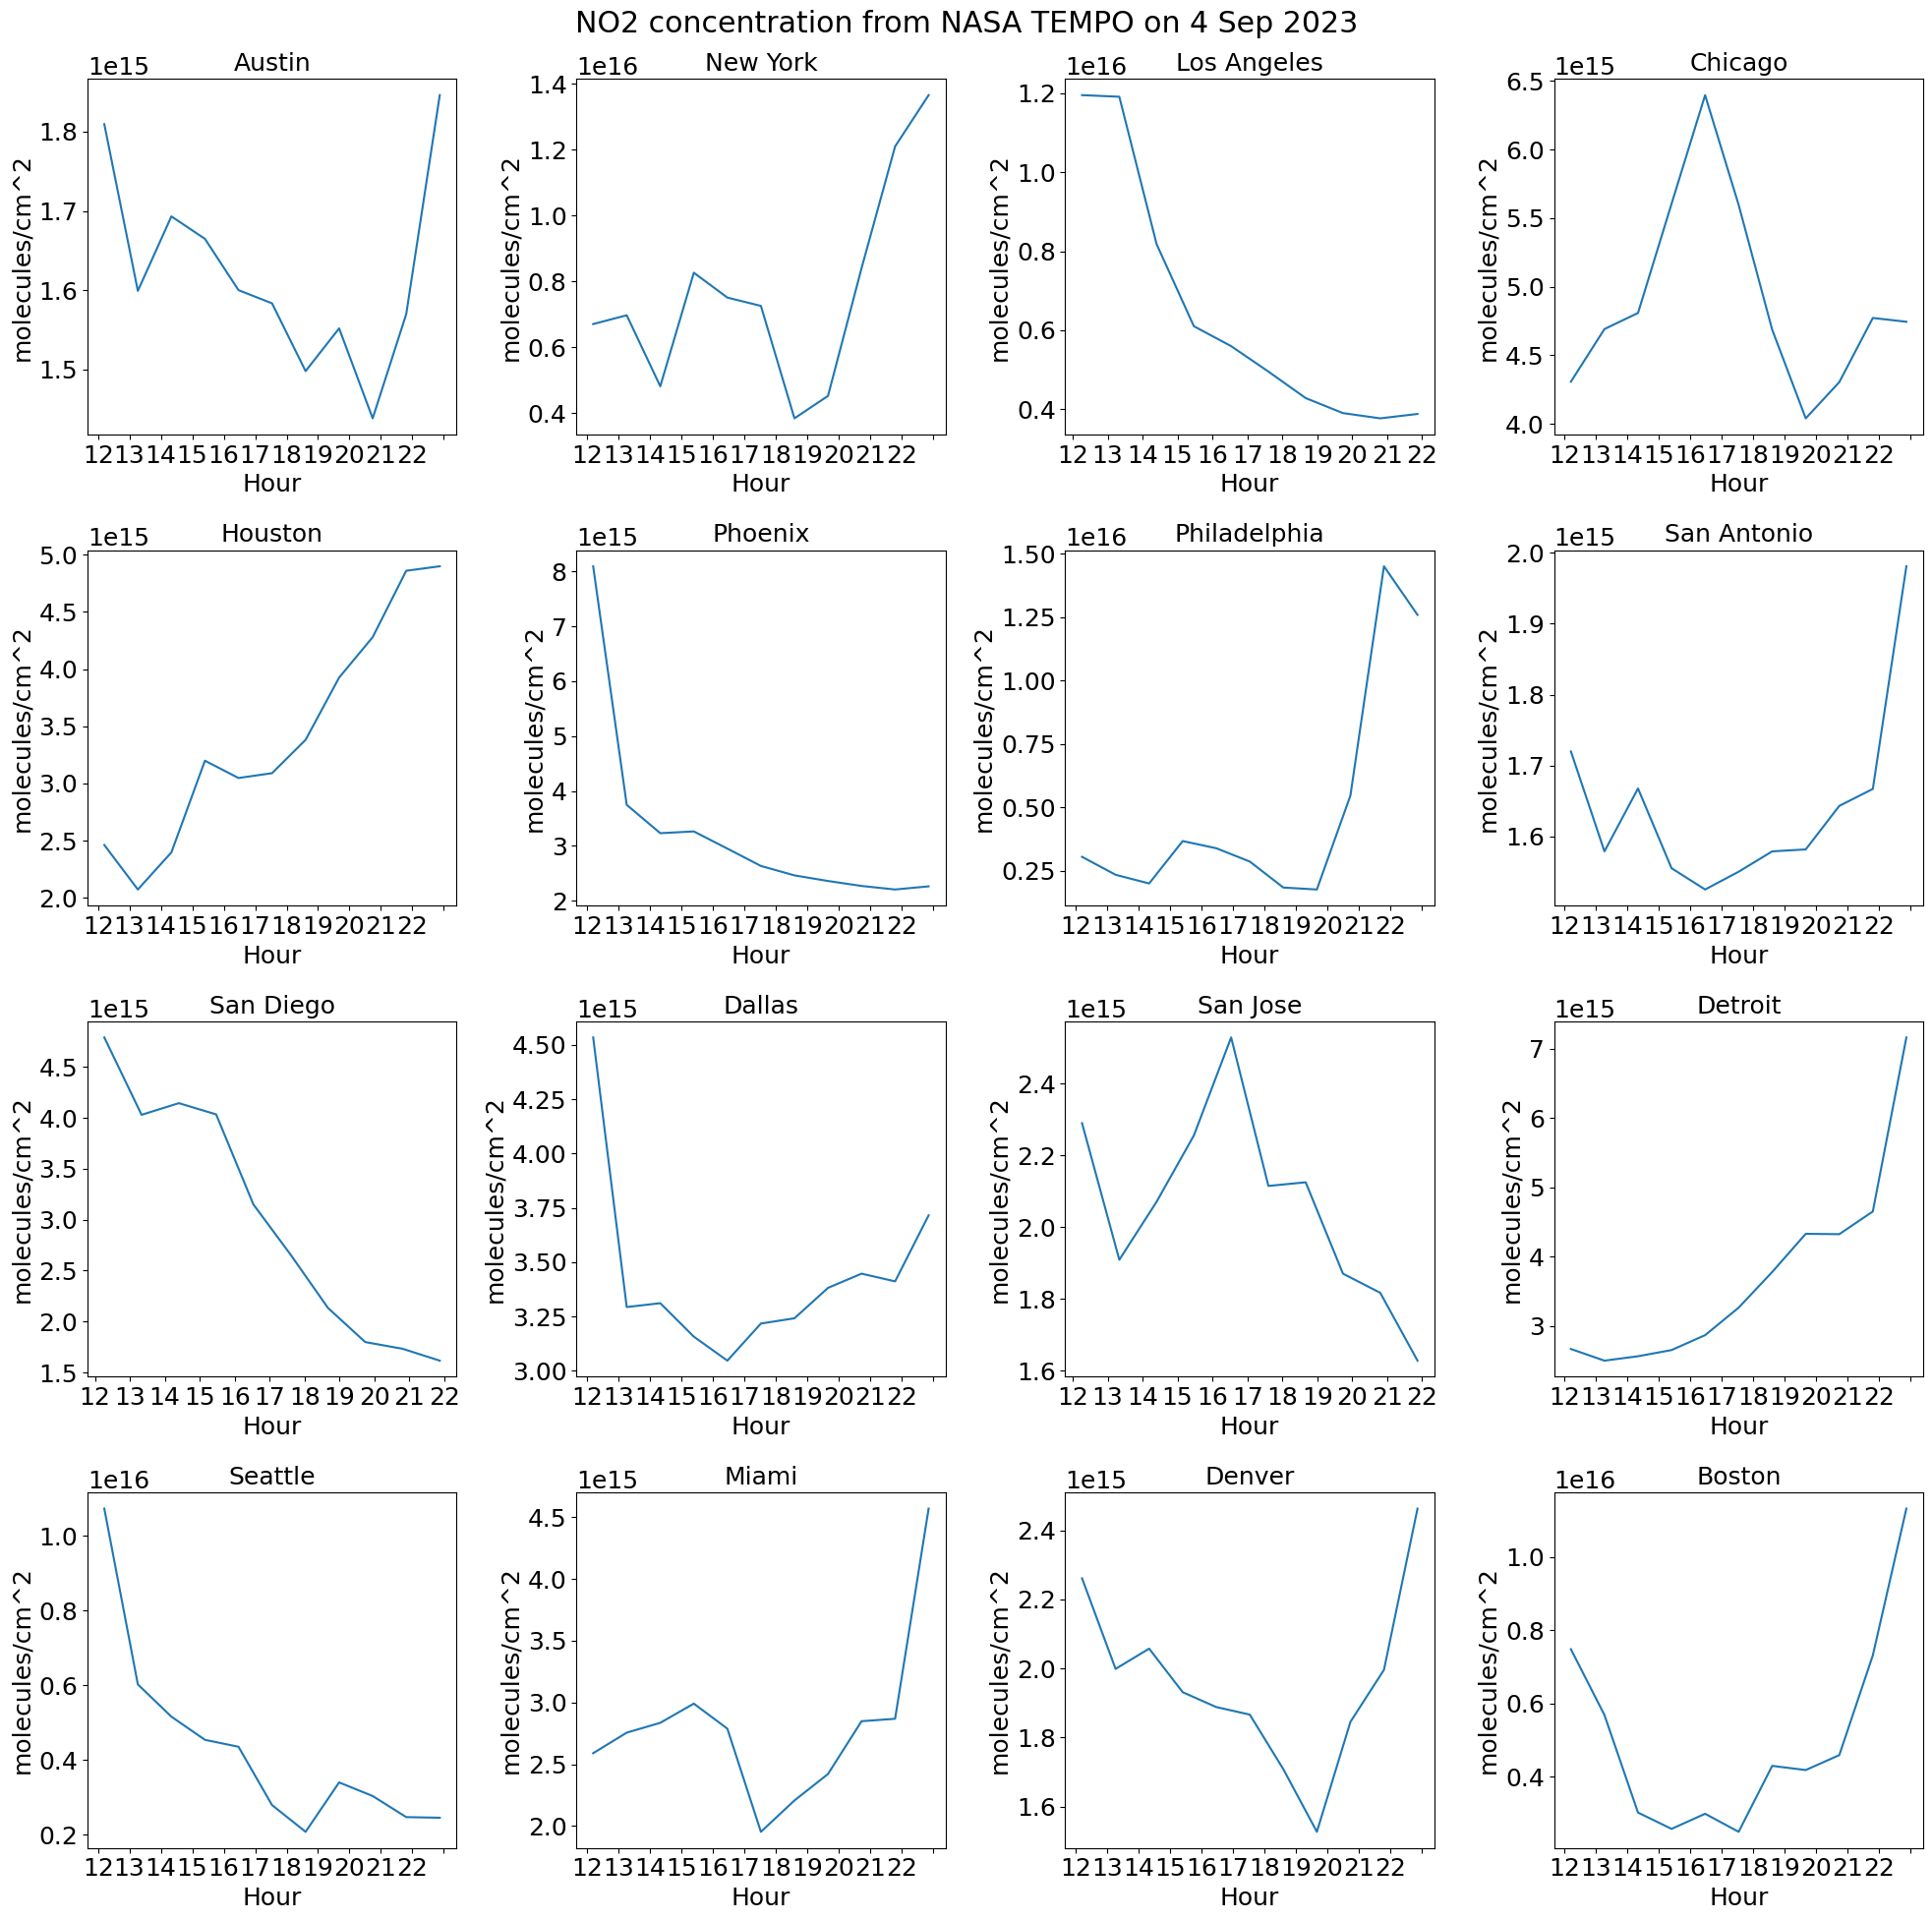

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Define a list of cities with their latitudes and longitudes
cities = {
    "Austin": (30.2672, -97.7431),
    "New York": (40.7128, -74.0060),
    "Los Angeles": (34.0522, -118.2437),
    "Chicago": (41.8781, -87.6298),
    "Houston": (29.7604, -95.3698),
    "Phoenix": (33.4484, -112.0740),
    "Philadelphia": (39.9526, -75.1652),
    "San Antonio": (29.4241, -98.4936),
    "San Diego": (32.7157, -117.1611),
    "Dallas": (32.7767, -96.7970),
    "San Jose": (37.3382, -121.8863),
    "Detroit": (42.3314, -83.0458),
    "Seattle": (47.6062, -122.3321),
    "Miami": (25.7617, -80.1918),
    "Denver": (39.7392, -104.9903),
    "Boston": (42.3601, -71.0589)
}

# Set larger font sizes for labels, titles, and ticks
plt.rcParams.update({
    'font.size': 18,        # Default text size
    'axes.titlesize': 18,   # Title size for each subplot
    'axes.labelsize': 18,   # Label size (xlabel, ylabel)
    'xtick.labelsize': 18,  # x-axis tick labels
    'ytick.labelsize': 18   # y-axis tick labels
})

# Create a figure with a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the cities and plot data for each
for i, (city, (lat, lon)) in tqdm(enumerate(cities.items())):
    # Subset the data for the current city
    ds_city = ds.sel(latitude=slice(lat-0.5, lat+0.5)).sel(longitude=slice(lon-0.5, lon+0.5)).compute()
    
    # Calculate the mean NO2 concentration for the city
    no2_mean = ds_city.mean(dim='latitude').mean(dim='longitude')
    
    # Plot the mean NO2 concentration for the city on the corresponding subplot
    no2_mean.plot(ax=axes[i])
    
    # Set the title and labels for each subplot
    axes[i].set_title(f'{city}')
    axes[i].set_ylabel('molecules/cm^2')
    
    # Format the x-axis to show only hours, remove 't'
    x_ticks = pd.to_datetime(no2_mean.indexes['time']).strftime('%H')  # Extract hour in 24-hour format
    axes[i].set_xticklabels(x_ticks)
    axes[i].set_xlabel('Hour')  # Set the x-axis label as Hour
    #axes[i].set_ylim([3.5,4.5])

# Adjust the layout so that subplots don't overlap
plt.suptitle('NO2 concentration from NASA TEMPO on 4 Sep 2023')
plt.tight_layout()


# Save the figure to a file
plt.savefig('us_cities_no2_concentration_clim.png', dpi=300)  # Save as PNG with high resolution

# Display the plot
plt.show()
